In [1]:
import requests

In [2]:
import os
from dotenv import load_dotenv
import pandas as pd

In [3]:
env_file = 'env_vars_qyl.env'
load_dotenv(env_file)
myAPIkey = os.getenv('ALPHAVANTAGE_KEY')
print(myAPIkey)

1XKSGV3DH1BSDSS0


In [4]:
symbol=["BABA","RYB"]
API_URL = "https://www.alphavantage.co/query"

In [5]:
stock_info={}
for i in symbol:
    date={
        "function": "TIME_SERIES_INTRADAY",
        "symbol": i,
        "interval": "5min",
        "datatype": "json",
        "apikey": myAPIkey
    }
    response=requests.get(API_URL,date)
    stock_infos=response.json()
    stock_info[i]=stock_infos['Time Series (5min)']
stock_info

{'BABA': {'2020-02-25 16:00:00': {'1. open': '205.0100',
   '2. high': '205.9100',
   '3. low': '204.9500',
   '4. close': '205.6000',
   '5. volume': '514608'},
  '2020-02-25 15:55:00': {'1. open': '205.0400',
   '2. high': '205.2700',
   '3. low': '204.9200',
   '4. close': '205.0400',
   '5. volume': '488393'},
  '2020-02-25 15:50:00': {'1. open': '205.0100',
   '2. high': '205.7450',
   '3. low': '205.0000',
   '4. close': '205.0000',
   '5. volume': '280030'},
  '2020-02-25 15:45:00': {'1. open': '204.7800',
   '2. high': '205.3000',
   '3. low': '204.7500',
   '4. close': '204.9750',
   '5. volume': '270934'},
  '2020-02-25 15:40:00': {'1. open': '205.0200',
   '2. high': '205.0500',
   '3. low': '204.7400',
   '4. close': '204.7700',
   '5. volume': '160316'},
  '2020-02-25 15:35:00': {'1. open': '205.4700',
   '2. high': '205.5500',
   '3. low': '204.6600',
   '4. close': '205.0000',
   '5. volume': '192763'},
  '2020-02-25 15:30:00': {'1. open': '205.6400',
   '2. high': '205.

In [6]:
df_BABA=pd.DataFrame(stock_info["BABA"])
df_BABA=df_BABA.transpose()
df_BABA

,1. open,2. high,3. low,4. close,5. volume
2020-02-25 16:00:00,205.0100,205.9100,204.9500,205.6000,514608
2020-02-25 15:55:00,205.0400,205.2700,204.9200,205.0400,488393
2020-02-25 15:50:00,205.0100,205.7450,205.0000,205.0000,280030
2020-02-25 15:45:00,204.7800,205.3000,204.7500,204.9750,270934
2020-02-25 15:40:00,205.0200,205.0500,204.7400,204.7700,160316
...,...,...,...,...,...
2020-02-24 14:35:00,205.2500,205.3350,205.2000,205.2100,98655
2020-02-24 14:30:00,204.8500,205.4000,204.8200,205.2500,142396
2020-02-24 14:25:00,204.4100,204.9000,204.4100,204.8300,81697
2020-02-24 14:20:00,204.1600,204.5600,204.1600,204.3900,84086


In [7]:
df_RYB=pd.DataFrame(stock_info['RYB'])
df_RYB=df_RYB.transpose()
df_RYB

,1. open,2. high,3. low,4. close,5. volume
2020-02-25 15:05:00,5.0400,5.0719,5.0400,5.0719,343
2020-02-25 14:50:00,5.0500,5.0500,5.0500,5.0500,95
2020-02-25 14:25:00,5.0500,5.0500,5.0500,5.0500,780
2020-02-25 14:10:00,5.0500,5.0700,5.0500,5.0700,467
2020-02-25 13:30:00,5.0700,5.0700,5.0500,5.0500,629
...,...,...,...,...,...
2020-02-18 10:05:00,5.1000,5.1000,5.1000,5.1000,599
2020-02-18 09:40:00,5.1000,5.1000,5.1000,5.1000,154
2020-02-18 09:35:00,5.1000,5.1000,5.1000,5.1000,212
2020-02-14 16:00:00,5.1300,5.1300,5.1300,5.1300,152


In [8]:
import matplotlib.pyplot as plt

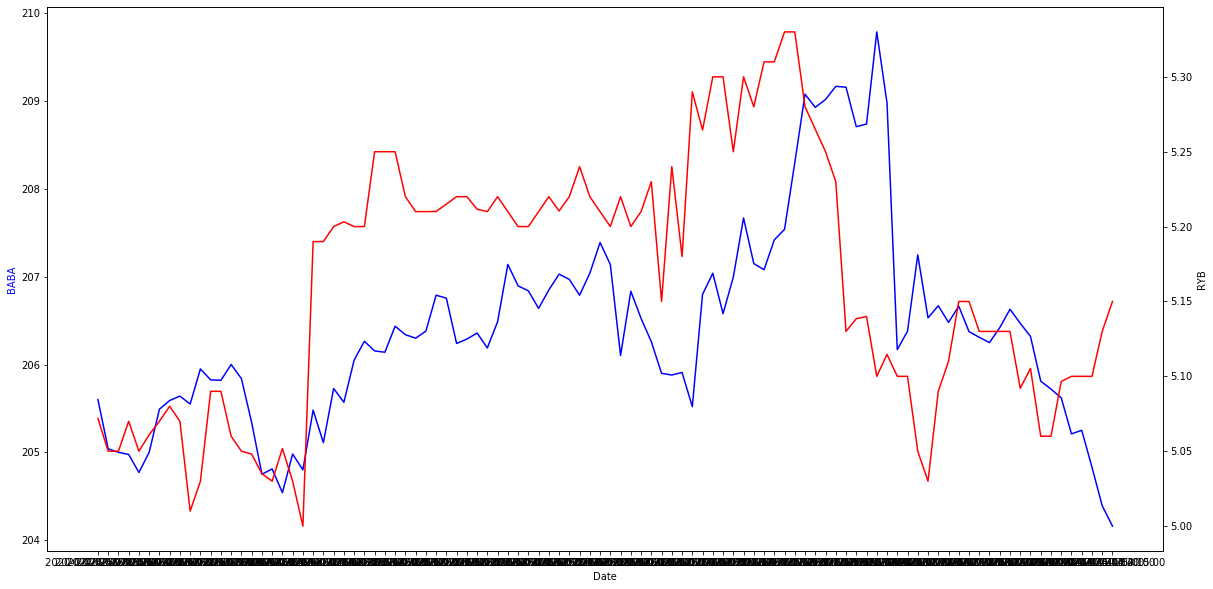

In [9]:
BABAPrice=list(map(lambda x:float(x),df_BABA['4. close']))
RYBPrice=list(map(lambda x:float(x),df_RYB['4. close']))
Date=list(df_BABA.index)
fig,ax1=plt.subplots(figsize=(20,10))
ax2=ax1.twinx()
ax1.set_xlabel("Date")
ax1.set_ylabel("BABA",color='blue')
ax2.set_ylabel("RYB")
line1=ax1.plot(Date,BABAPrice,'r',label='BABA',color='blue')
line2=ax2.plot(Date,RYBPrice,'r',label='RYB')
plt.show()

In [10]:
import numpy as np

In [11]:
df_return=pd.concat([df_BABA['4. close'],df_RYB['4. close']],axis=1,sort=True)
df_return

,4. close,4. close
2020-02-14 15:55:00,NaN,5.1500
2020-02-14 16:00:00,NaN,5.1300
2020-02-18 09:35:00,NaN,5.1000
2020-02-18 09:40:00,NaN,5.1000
2020-02-18 10:05:00,NaN,5.1000
...,...,...
2020-02-25 15:40:00,204.7700,NaN
2020-02-25 15:45:00,204.9750,NaN
2020-02-25 15:50:00,205.0000,NaN
2020-02-25 15:55:00,205.0400,NaN


In [12]:
df_return.corr()

""
